Dataset Information:
https://www.researchgate.net/publication/325117645_A_Comparative_study_of_machine_learning_algorithms_on_thyroid_disease_prediction

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [19]:
# Load dataset
train_path = os.path.join(os.getcwd(), 'W6/ann-train.data')
test_path = os.path.join(os.getcwd(), 'W6/ann-test.data')

train_data = pd.read_csv(train_path, sep=r'\s+', header=None)
test_data = pd.read_csv(test_path, sep=r'\s+', header=None)

#TODO: Split into X and y

X_train, y_train = train_data.iloc[:, : -1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, : -1], test_data.iloc[:, -1]

# Q1

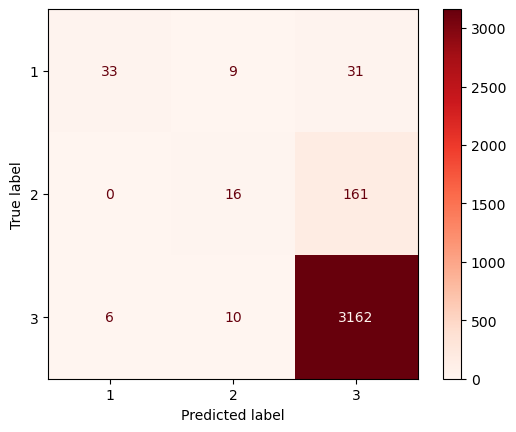

----------------------------
Accuracy: 93.67%


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#TODO: Step 1: Train a k-NN model (choose some reasonable value for k)
k = 5  # Choose a value for k (e.g., 5)

knn_model = KNeighborsClassifier(k)

knn_model.fit(X_train, y_train)


#TODO: Step 2: Make Predictions

predictions = knn_model.predict(X_test)


#TODO: Step 3: Evaluate Model

conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)


# Step 4: Visualize the confusion matrix as a heatmap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap='Reds')
plt.show()

print('----------------------------')
print(f"Accuracy: {np.around(accuracy*100, 2)}%")

# Q2

(a)

In [59]:
#TODO: Convert dataset to perform binary classification

train_data_binary = train_data.copy()
test_data_binary = test_data.copy()

train_binary = 1 - pd.get_dummies(train_data.iloc[:, -1], dtype=int).iloc[:, 0]
test_binary = 1 - pd.get_dummies(test_data.iloc[:, -1], dtype=int).iloc[:, 0]

train_binary.name = train_data_binary.columns[-1]
test_binary.name = test_data_binary.columns[-1]

train_data_binary = train_data_binary.drop(train_data_binary.columns[-1], axis=1).join(train_binary)

test_data_binary = test_data_binary.drop(test_data_binary.columns[-1], axis=1).join(test_binary)

#TODO: Split X and y

X_train_binary, y_train_binary = train_data_binary.iloc[:, : -1], train_data_binary.iloc[:, -1]
X_test_binary, y_test_binary = test_data_binary.iloc[:, : -1], test_data_binary.iloc[:, -1]


(b)

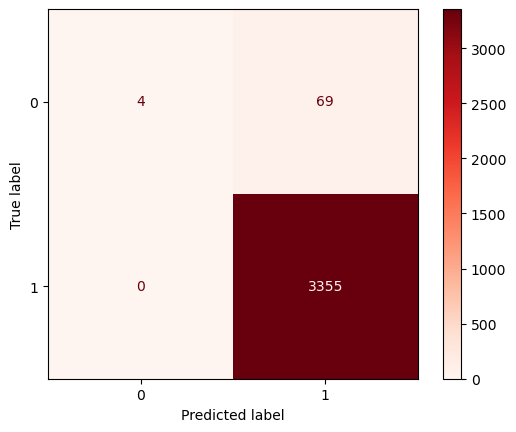

[[   4   69]
 [   0 3355]]
----------------------------
Accuracy: 97.99%


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#TODO: Train logistic regression model

clf = LogisticRegression()
clf.fit(X_train_binary, y_train_binary)

#TODO: Make predictions on the test set

y_pred_binary = clf.predict(X_test_binary)

#TODO: Calculate the confusion matrix

conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_binary, display_labels=clf.classes_)
disp.plot(cmap='Reds')
plt.show()

print(conf_matrix_binary)

print('----------------------------')
print(f"Accuracy: {np.around(accuracy_binary*100, 2)}%")

(c)


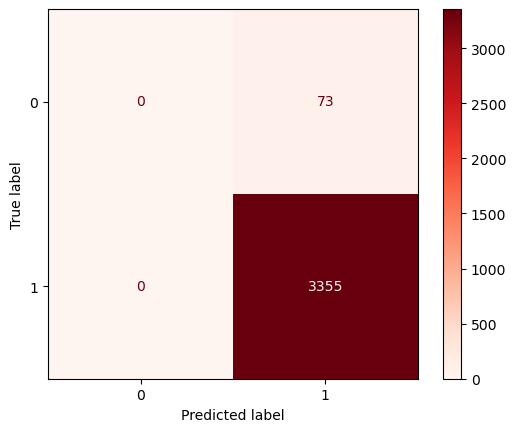

[[   0   73]
 [   0 3355]]
----------------------------
Accuracy: 97.99%


In [70]:
threshold = 0.15  # Vary the threshold as you want

#TODO: Recalculate the confusion matrix
#HINT: You can use the probability functions and threshold to obtain the new predictions from the trained model

y_pred_proba = clf.predict_proba(X_test_binary)

y_pred_proba = y_pred_proba[:, 1] > threshold + 0

conf_matrix_proba = confusion_matrix(y_test_binary, y_pred_proba)
accuracy_proba = accuracy_score(y_test_binary, y_pred_proba)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_proba, display_labels=clf.classes_)
disp.plot(cmap='Reds')
plt.show()

print(conf_matrix_proba)

print('----------------------------')
print(f"Accuracy: {np.around(accuracy_binary*100, 2)}%")


# Q3

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Load the dataset
path = os.path.join(os.getcwd(), 'W4/pokemonregr.csv')
data = pd.read_csv(path)

print(f"{data.head()}\n")

#TODO: Clean and Split dataset

# Handle missing data - impute/drop/etc. (justify your choices)

# Impute to Capture Data

df_imp = data.copy()

for i in range(data.shape[1]):
    if data.iloc[:, i].dtype == 'object':
        df_imp.iloc[:, i] = data.iloc[:, i].fillna(data.iloc[:, i].mode().iloc[0])
    else:
        df_imp.iloc[:, i] = data.iloc[:, i].fillna(data.iloc[:, i].mean())

print(f"{df_imp.isnull().sum()}\n") # Check if all NAs are dropped

# Define X, y

X = df_imp.drop('weight_kg', axis=1)
y = df_imp['weight_kg']

   attack  defense  height_m  sp_attack  sp_defense  speed  weight_kg
0      30       35       0.3         20          20     45        2.9
1      20       55       0.7         25          25     30        9.9
2      45       50       1.1         90          80     70       32.0
3      35       30       0.3         20          20     50        3.2
4      25       50       0.6         25          25     35       10.0

attack        0
defense       0
height_m      0
sp_attack     0
sp_defense    0
speed         0
weight_kg     0
dtype: int64



In [72]:
# Define a function to use regularization with linear regression model
def fit_linear(regularization=None, alpha=1.0):
  #TODO: Train a linear regression model according to the specified regularization type

  match regularization:
    case 'L1':
      model = Lasso(alpha=alpha)
    case 'L2':
      model = Ridge(alpha=alpha)
    case default:
      model = LinearRegression()

  model.fit(X, y)

  return model

# Fit and obtain coefficients when using different regularization techniques with different regularization hyperparameter
reg = [None, 'L1', 'L2']

for r in reg:
  #TODO: train a model for each regularization type
  model = fit_linear(r)
  print(f"Coef when using {r} Regularization: {model.coef_}")
  print("------------------")

Coef when using None Regularization: [ 3.57073776e-01  5.51563573e-01  5.38438804e+01  1.52883140e-02
  1.58541752e-01 -3.94064114e-01]
------------------
Coef when using L1 Regularization: [ 3.65720929e-01  5.57770459e-01  5.26953858e+01  2.03343705e-02
  1.61555637e-01 -3.90988042e-01]
------------------
Coef when using L2 Regularization: [ 3.57752640e-01  5.51968958e-01  5.37650612e+01  1.57083170e-02
  1.58817434e-01 -3.94019239e-01]
------------------


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

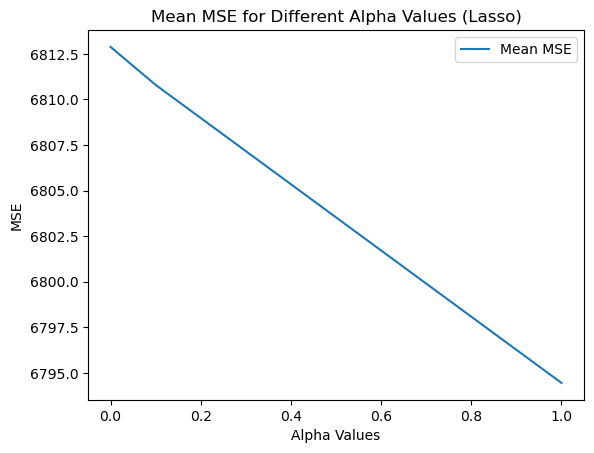

Optimal Value of Alpha: 1


In [86]:
mse = make_scorer(mean_squared_error, greater_is_better=False)

alphas = [1 if i == 0 else 10 ** -i for i in range(10)]

parameters = {'alpha': alphas}

clf = Lasso()
gs_clf = GridSearchCV(estimator=clf, param_grid=parameters, scoring=mse)

gs_clf.fit(X=X, y=y)

fig, ax = plt.subplots()

errors = -1 * np.array(gs_clf.cv_results_['mean_test_score'])

ax.plot(alphas, errors, label='Mean MSE')

plt.legend()
plt.title('Mean MSE for Different Alpha Values (Lasso)')
plt.ylabel('MSE')
plt.xlabel('Alpha Values')
plt.show()

print(f'Optimal Value of Alpha: {alphas[np.where(errors == np.min(errors))[0][0]]}')

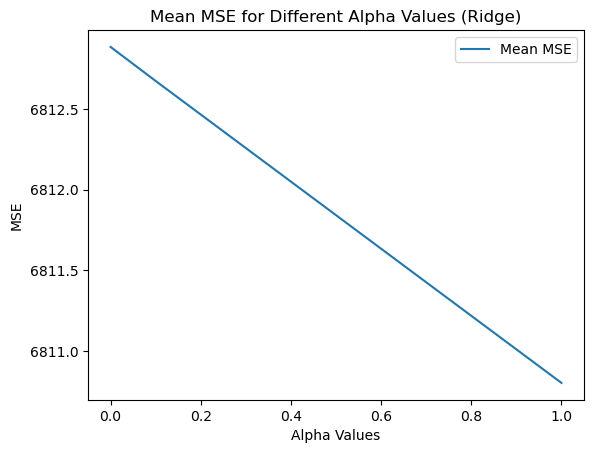

Optimal Value of Alpha: 1


In [85]:
mse = make_scorer(mean_squared_error, greater_is_better=False)

alphas = [1 if i == 0 else 10 ** -i for i in range(10)]

parameters = {'alpha': alphas}

clf = Ridge()
gs_clf = GridSearchCV(estimator=clf, param_grid=parameters, scoring=mse)

gs_clf.fit(X=X, y=y)

fig, ax = plt.subplots()

errors = -1 * np.array(gs_clf.cv_results_['mean_test_score'])

ax.plot(alphas, errors, label='Mean MSE')

plt.legend()
plt.title('Mean MSE for Different Alpha Values (Ridge)')
plt.ylabel('MSE')
plt.xlabel('Alpha Values')
plt.show()

print(f'Optimal Value of Alpha: {alphas[np.where(errors == np.min(errors))[0][0]]}')